In [1]:
import pandas as pd


data = pd.read_csv('data/2315676.txt', na_values = [-9999], skiprows=[1], delim_whitespace=True)

In [2]:
data.head()

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN
0,GHCND:FI000007501,SODANKYLA-AWS-FI,19080101,NaN,2.0,-37.0
1,GHCND:FI000007501,SODANKYLA-AWS-FI,19080102,NaN,6.0,-26.0
2,GHCND:FI000007501,SODANKYLA-AWS-FI,19080103,NaN,7.0,-27.0
3,GHCND:FI000007501,SODANKYLA-AWS-FI,19080104,NaN,-3.0,-27.0
4,GHCND:FI000007501,SODANKYLA-AWS-FI,19080105,NaN,4.0,-36.0


In [3]:
# Here the NA-values in TAVG column are replaced by the mean values counted with the TMAX and TMIN.
# Then the remaining NA values that couldn't be filled were removed.

data['TAVG'].fillna((data['TMAX'] + data['TMIN']) / 2, inplace=True)
data.dropna(subset = ['TAVG'], inplace = True)

In [4]:
data.loc[200:205,:]

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN
200,GHCND:FI000007501,SODANKYLA-AWS-FI,19080719,59.5,67.0,52.0
201,GHCND:FI000007501,SODANKYLA-AWS-FI,19080720,61.5,69.0,54.0
202,GHCND:FI000007501,SODANKYLA-AWS-FI,19080721,55.5,66.0,45.0
203,GHCND:FI000007501,SODANKYLA-AWS-FI,19080722,53.5,63.0,44.0
205,GHCND:FI000007501,SODANKYLA-AWS-FI,19080724,64.0,78.0,50.0


In [5]:
data.head()

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN
0,GHCND:FI000007501,SODANKYLA-AWS-FI,19080101,-17.5,2.0,-37.0
1,GHCND:FI000007501,SODANKYLA-AWS-FI,19080102,-10.0,6.0,-26.0
2,GHCND:FI000007501,SODANKYLA-AWS-FI,19080103,-10.0,7.0,-27.0
3,GHCND:FI000007501,SODANKYLA-AWS-FI,19080104,-15.0,-3.0,-27.0
4,GHCND:FI000007501,SODANKYLA-AWS-FI,19080105,-16.0,4.0,-36.0


In [6]:
# Here a function called 'fahr_to_celsius' was created. The function was applied to each column that had temperature values.

def fahr_to_celsius(temp_fahrenheit):
    return (temp_fahrenheit - 32)/1.8

data['TAVG'] = data['TAVG'].apply(fahr_to_celsius)
data['TMAX'] = data['TMAX'].apply(fahr_to_celsius)
data['TMIN'] = data['TMIN'].apply(fahr_to_celsius)

In [7]:
data.loc[200:205,:]

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN
200,GHCND:FI000007501,SODANKYLA-AWS-FI,19080719,15.277778,19.444444,11.111111
201,GHCND:FI000007501,SODANKYLA-AWS-FI,19080720,16.388889,20.555556,12.222222
202,GHCND:FI000007501,SODANKYLA-AWS-FI,19080721,13.055556,18.888889,7.222222
203,GHCND:FI000007501,SODANKYLA-AWS-FI,19080722,11.944444,17.222222,6.666667
205,GHCND:FI000007501,SODANKYLA-AWS-FI,19080724,17.777778,25.555556,10.000000


In [8]:
# Here another function, called 'get_season' was created.
# First was determined, that 'month' means the value between 4th and 6th numbers of the date-string.
# Then it uses conditional statements to classify the dates into one of the 4 seasons based on their months.
# If there were any problems with the date data, and determining the month would be unsure, the function would return the season as 'UNKNOWN'

def get_season(date):
    month = str(date)[4:6]
    if(month == "12" or month == "01" or month == "02"):
        return "WINTER"
    elif(month == "03" or month == "04" or month == "05"):
        return "SPRING"
    elif(month == "06" or month == "07" or month == "08"):
        return "SUMMER"
    elif(month == "09" or month == "10" or month == "11"):
        return "AUTUMN"
    else:
        return "UNKNOWN"

# Yet another funtion called 'get_year' was created. It uses the same logic as the 'get_season'-function.
    
    
def get_year(date):
    return int(str(date)[0:4])

# Here the columns 'SEASON' and 'YEAR' were created as new columns to 'data'.
# Using the newly created functions, the information about each rows season and year are gathered into the new columns.
# Both of them will be needed later in the exercise.

data['SEASON'] = data['DATE'].apply(get_season)
data['YEAR'] = data['DATE'].apply(get_year)

In [9]:
data.head()

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN,SEASON,YEAR
0,GHCND:FI000007501,SODANKYLA-AWS-FI,19080101,-27.500000,-16.666667,-38.333333,WINTER,1908
1,GHCND:FI000007501,SODANKYLA-AWS-FI,19080102,-23.333333,-14.444444,-32.222222,WINTER,1908
2,GHCND:FI000007501,SODANKYLA-AWS-FI,19080103,-23.333333,-13.888889,-32.777778,WINTER,1908
3,GHCND:FI000007501,SODANKYLA-AWS-FI,19080104,-26.111111,-19.444444,-32.777778,WINTER,1908
4,GHCND:FI000007501,SODANKYLA-AWS-FI,19080105,-26.666667,-15.555556,-37.777778,WINTER,1908


In [10]:
# Here the reference period is determined using the new 'YEAR'-column and the pandas between-function.
# ref_period is then grouped by 'SEASON', and the mean of 'TAVG' is calculated for each season.
# The seasonal average temperature of the reference period is thus calculated.

ref_period = data.loc[data['YEAR'].between(1951,1980)]

ref_period.groupby(['SEASON'], as_index = False)['TAVG'].mean()

,SEASON,TAVG
0,AUTUMN,-0.814910
1,SPRING,-2.338307
2,SUMMER,12.400262
3,WINTER,-13.552540


In [11]:
# The same is now done to all of the values, as was just done to only those from the referense period.
# So that the seasonal average temperature is calculated for the whole period.

seasonal_avg = data.groupby(['SEASON'], as_index = False)['TAVG'].mean()

#The data is then grouped by 'YEAR' and 'SEASON', to calculate the _yearly_ average temperatures for each season.

yearly_avg = data.groupby(['YEAR','SEASON'], as_index = False)['TAVG'].mean()

# Another function was created
# THe function calculates, how much a said temperature is different from its seasonal average temperature from the said year.

def get_seasonal_diff(YEAR,SEASON,TAVG):
    s_avg = seasonal_avg.loc[seasonal_avg['SEASON'] == SEASON]
    return TAVG - s_avg.iloc[0]['TAVG']


# A new column is created to the yearly-avg, where the outcomes of the get_seasonal_diff-function are stored.

yearly_avg['DIFF'] = yearly_avg.apply(lambda x: get_seasonal_diff(x['YEAR'], x['SEASON'], x['TAVG']), axis=1)

    
    
yearly_avg.head()
    

,YEAR,SEASON,TAVG,DIFF
0,1908,AUTUMN,-1.859217,-1.425217
1,1908,SPRING,-2.346743,-0.353523
2,1908,SUMMER,11.425926,-1.037162
3,1908,WINTER,-12.330779,0.546380
4,1909,AUTUMN,-0.155827,0.278174


In [12]:
#Based on their seasons, the data from yearly_avg are divided into their own subsets.

winter = yearly_avg.loc[yearly_avg['SEASON'] == 'WINTER']

spring = yearly_avg.loc[yearly_avg['SEASON'] == 'SPRING']

summer = yearly_avg.loc[yearly_avg['SEASON'] == 'SUMMER']

autumn = yearly_avg.loc[yearly_avg['SEASON'] == 'AUTUMN']

In [13]:
print(winter)

     YEAR  SEASON       TAVG      DIFF
3    1908  WINTER -12.330779  0.546380
7    1909  WINTER -11.580933  1.296226
11   1910  WINTER  -9.471767  3.405392
15   1911  WINTER -11.719409  1.157750
19   1912  WINTER -18.745098 -5.867939
..    ...     ...        ...       ...
435  2016  WINTER -11.190476  1.686683
439  2017  WINTER -10.111111  2.766048
443  2018  WINTER -11.555556  1.321604
447  2019  WINTER -11.395062  1.482097
451  2020  WINTER  -9.194444  3.682715

[113 rows x 4 columns]


array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

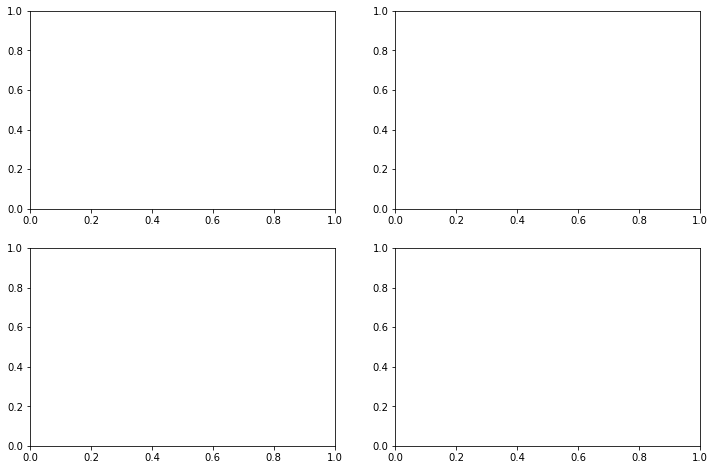

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt


# A new subplot figure is created

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axs

In [15]:
#The different axes are named to access them

ax1 = axs[0][0]
ax2 = axs[0][1]
ax3 = axs[1][0]
ax4 = axs[1][1]

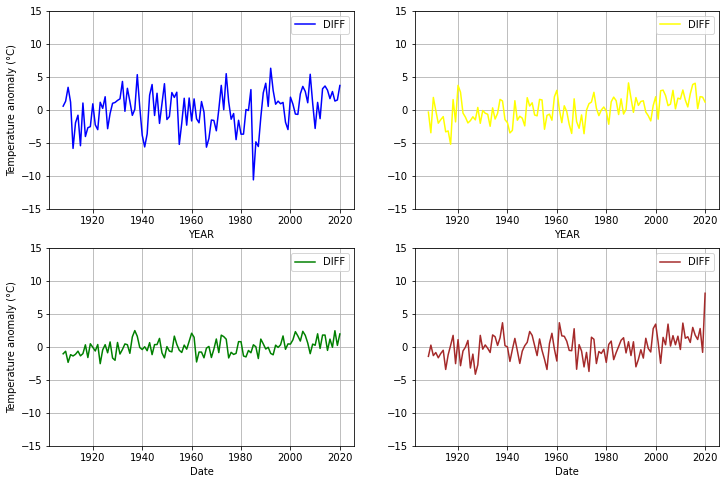

In [16]:
# The data from the seasons are added to each axis.
# Additional information about the axes are specifies, such as the column names, linewidth, y-axis limit and colour.
# The line colours were chosen so that they would best represent their seasons.

winter.plot(ax=ax1, x= 'YEAR', y= 'DIFF', c= 'blue', lw=1.5, ylim = [-15,15], grid=True)
spring.plot(ax=ax2, x= 'YEAR', y= 'DIFF', c= 'yellow', lw=1.5, ylim = [-15,15], grid=True)
summer.plot(ax=ax3, x= 'YEAR', y= 'DIFF', c= 'green', lw=1.5, ylim = [-15,15], grid=True)
autumn.plot(ax=ax4, x= 'YEAR', y= 'DIFF', c= 'brown', lw=1.5, ylim = [-15,15], grid=True)

# The labels are added here

ax1.set_ylabel("Temperature anomaly (°C)")
ax3.set_ylabel("Temperature anomaly (°C)")
ax3.set_xlabel("Date")
ax4.set_xlabel("Date")


fig

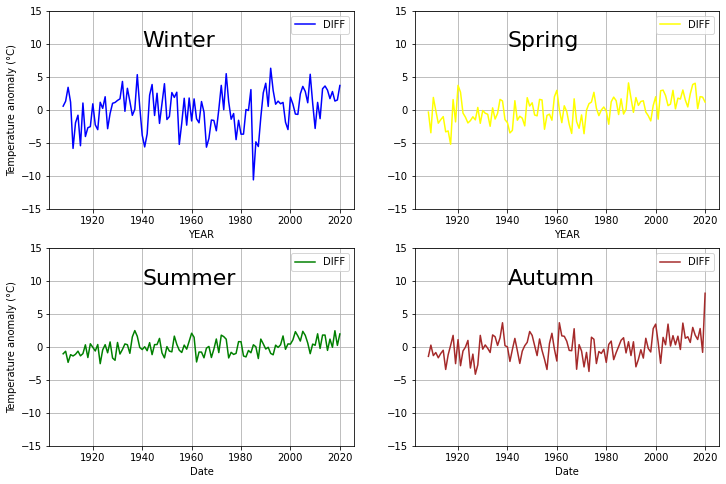

In [17]:
# The season labels are added as text to the plot. The placement was determined so that the text would be as centered as possible

ax1.text(1940, 9.5,'Winter', fontsize = 22)
ax2.text(1940, 9.5,'Spring', fontsize = 22)
ax3.text(1940, 9.5,'Summer', fontsize = 22)
ax4.text(1940, 9.5,'Autumn', fontsize = 22)

fig